## Notebook 4: 

For Notebook 4, repeating all the steps in Notebook 3 using the Prostate data set. The target is LPSA (log PSA test results). 


In [14]:
import urllib
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [15]:
#C:\Users\email\OneDrive\Documents\Sandhya\Predictive Modeling\Pred_Models_git-master\Week 2\data
pathname = 'C:/Users/email/Downloads/Predictive Modelling Misc/data/'
df = pd.read_csv(pathname + "prostate.csv")#,header = None) 
df.head()

,Obs,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


In [16]:
column_list = list(range(0,5)) +[30]+ list(range(101,118)) + list(range(121,125)) + [126]

In [17]:
#column_list

In [18]:
#df=df.drop(column_list, axis= 1)

In [19]:
df.shape

(97, 10)

In [20]:
#com.shape

In [21]:
# all columnswith their data type in the data frame
df.dtypes

Obs          int64
lcavol     float64
lweight    float64
age          int64
lbph       float64
svi          int64
lcp        float64
gleason      int64
pgg45        int64
lpsa       float64
dtype: object

In [22]:
# checking for any categorical variable
obj_df = df.select_dtypes(include=['object']).copy()

# dropping the empty rows at file-end
#obj_df.dropna(how="all", inplace=True) 
obj_df[:3]
# no categorical variable

""
0
1
2


In [23]:
# descriptive statistics for all columns
df.describe()

,Obs,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,28.145456,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,1.000000,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,25.000000,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,49.000000,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,73.000000,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,97.000000,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [24]:
# showing columns with missing values
nulls = df.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

In [25]:
# checking any missing value in the dataset
#com.describe()
#com
#com.isnull()
df.isnull().values.any()
# no NaN value

False

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
Obs        97 non-null int64
lcavol     97 non-null float64
lweight    97 non-null float64
age        97 non-null int64
lbph       97 non-null float64
svi        97 non-null int64
lcp        97 non-null float64
gleason    97 non-null int64
pgg45      97 non-null int64
lpsa       97 non-null float64
dtypes: float64(5), int64(5)
memory usage: 7.7 KB


In [27]:
# designate target variable name
targetName = 'lpsa'
targetSeries = df[targetName]
#remove target from current location and insert in column 0
del df[targetName]
df.insert(0, targetName, targetSeries)
#targetSeries #new target 
#reprint dataframe and see target is in position 0
df.head(10)

,lpsa,Obs,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-0.430783,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
1,-0.162519,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
2,-0.162519,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
3,-0.162519,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
4,0.371564,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0
5,0.765468,6,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0
6,0.765468,7,0.737164,3.473518,64,0.615186,0,-1.386294,6,0
7,0.854415,8,0.693147,3.539509,58,1.536867,0,-1.386294,6,0
8,1.047319,9,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0
9,1.047319,10,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0


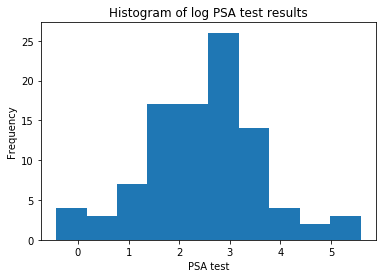

In [28]:
# EDA on target variable
n, bins, patches = plt.hist(df.lpsa)#, facecolor='blue', alpha=0.75)
#plt.ylim(0, 15)
plt.xlabel("PSA test")
plt.ylabel("Frequency")
plt.title('Histogram of log PSA test results')
plt.show()

In [29]:
df['lpsa'].describe()

count    97.000000
mean      2.478387
std       1.154329
min      -0.430783
25%       1.731656
50%       2.591516
75%       3.056357
max       5.582932
Name: lpsa, dtype: float64

In [30]:
df.columns[1:]

Index(['Obs', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason',
       'pgg45'],
      dtype='object')

In [31]:
df.feature_names = df.columns[1:]
#df.feature_names

In [32]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=33)
from sklearn.model_selection import train_test_split
# split dataset into testing and training
X_train, X_test, Y_train, Y_test = train_test_split(
    df.iloc[:,1:].values, df.iloc[:,0].values, test_size=0.3, random_state=3)

In [33]:
print(len(X_test), len(Y_test),len(X_train),len(Y_train))

30 30 67 67


In [34]:
print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)


(67, 9)
(30, 9)
(67,)
(30,)


###  Ridge Regression
So ridge regression puts constraint on the coefficients (w). The penalty term (lambda) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized. So, ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.

In [35]:
# Ridge Regression
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
# load the diabetes datasets
#dataset = datasets.load_diabetes()
# fit a ridge regression model to the data
model = Ridge(alpha=0.1)
model.fit(X_train, Y_train)
print(model)
# make predictions
expected = Y_train
predicted = model.predict(X_train)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print(mse)
print(model.score(X_train, Y_train))

Ridge(alpha=0.1)
0.10024864942146723
0.9243366613080282


### Lasso Regression
So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection. Just like Ridge regression the regularization parameter (lambda) can be controlled 

In [36]:
# Lasso Regression
# fit a LASSO model to the data
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
model.fit(X_train, Y_train)
print(model)
# make predictions
expected = Y_train
predicted = model.predict(X_train)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print(mse)
print(model.score(X_train, Y_train))

Lasso(alpha=0.1)
0.11581398476437711
0.9125886203448698


### ElasticNet Regression

In [37]:
# ElasticNet Regression
# fit a model to the data
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.1)
model.fit(X_train, Y_train)
print(model)
# make predictions
expected = Y_train
predicted = model.predict(X_train)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print(mse)
print(model.score(X_train, Y_train))

ElasticNet(alpha=0.1)
0.10737563817445357
0.918957518875855


Estimating Violent Crimes per population using Linear Regression

In [38]:
print(np.max(X_train), np.min(X_train), np.mean(X_train), np.max(Y_train), np.min(Y_train), np.mean(Y_train))

100.0 -1.38629436 16.33087852218408 5.5829322 -0.4307829000000001 2.434313567164179


In [39]:
#X_new
#X_new[:,0]

Find the most important features

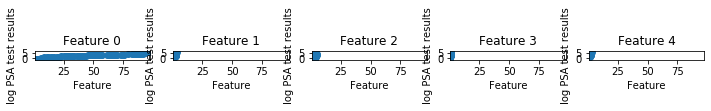

In [40]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import *
fs=SelectKBest(score_func=f_regression,k=5)
X_new=fs.fit_transform(X_train,Y_train)
print(zip(fs.get_support(),df.feature_names))
#print(X_new.scores_)
x_min, x_max = X_new[:,0].min() - .5, X_new[:, 0].max() + .5
y_min, y_max = Y_train.min() - .5, Y_train.max() + .5
#fig=plt.figure()
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Two subplots, unpack the axes array immediately
fig, axes = plt.subplots(1,5)
fig.set_size_inches(12,12)

for i in range(5):
    axes[i].set_aspect('equal')
    axes[i].set_title('Feature ' + str(i))
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('log PSA test results')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_new[:,i],Y_train)

Normalizing data

In [41]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
#scalerX = StandardScaler().fit(X_train)
#scalery = StandardScaler().fit(y_train)

#X_train = scalerX.transform(X_train)
#y_train = StandardScaler().fit_transform((y_train)
X_test = StandardScaler().fit_transform(X_test)
#y_test = StandardScaler().fit_transform(y_test)

print(np.max(X_train), np.min(X_train), np.mean(X_train), np.max(Y_train), np.min(Y_train), np.mean(Y_train))

3.226672515938694 -3.0604592774286976 -7.070076972737315e-17 5.5829322 -0.4307829000000001 2.434313567164179


Start with a lineal model, SGDRegressor, that tries to find the hyperplane that minimizes a certain loss function (typically, the sum of squared distances from each instance to the hyperplane). It uses Stochastic Gradient Descent to find the minimum. 

In [42]:
from sklearn.model_selection import *
def train_and_evaluate(clf, X_train, Y_train):
    
    clf.fit(X_train, Y_train)
    
    print("Coefficient of determination on training set:",clf.score(X_train, Y_train))
    
    # create a k-fold croos validation iterator of k=5 folds
    scores = cross_val_score(clf, X_train, Y_train, cv=5)
    print("Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores))

In [43]:
from sklearn import linear_model
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None,  random_state=42, shuffle=False)
print(clf_sgd)
train_and_evaluate(clf_sgd,X_train,Y_train)
print(clf_sgd.coef_)

SGDRegressor(penalty=None, random_state=42, shuffle=False)
Coefficient of determination on training set: 0.9115546741050975
Average coefficient of determination using 5-fold crossvalidation: 0.8244994492215343
[ 0.79289509  0.25561762  0.10120684 -0.06401495  0.05474939  0.08627919
  0.02594402 -0.0102192  -0.0475066 ]


In [44]:
clf_sgd1 = linear_model.SGDRegressor(loss='squared_loss', penalty='l2',  random_state=42)
train_and_evaluate(clf_sgd1,X_train,Y_train)

Coefficient of determination on training set: 0.912550932856899
Average coefficient of determination using 5-fold crossvalidation: 0.8226114829831348


In [45]:
clf_sgd2 = linear_model.SGDRegressor(loss='squared_loss', penalty='l1',  random_state=42)
train_and_evaluate(clf_sgd2,X_train,Y_train)

Coefficient of determination on training set: 0.9125673533908402
Average coefficient of determination using 5-fold crossvalidation: 0.8226687961250541


In [46]:
clf_sgd3 = linear_model.SGDRegressor(loss='squared_loss', penalty='elasticnet',  random_state=42)
train_and_evaluate(clf_sgd3,X_train,Y_train)

Coefficient of determination on training set: 0.9125534028724155
Average coefficient of determination using 5-fold crossvalidation: 0.8226201108903579


Ridge regression

In [47]:
clf_ridge = linear_model.Ridge()
train_and_evaluate(clf_ridge,X_train,Y_train)

Coefficient of determination on training set: 0.9239372829402736
Average coefficient of determination using 5-fold crossvalidation: 0.8711922701274961


SVR

In [48]:
from sklearn import svm
clf_svr= svm.SVR(kernel='linear')
train_and_evaluate(clf_svr,X_train,Y_train)

Coefficient of determination on training set: 0.9008946705824896
Average coefficient of determination using 5-fold crossvalidation: 0.8719445878735282


In [49]:
clf_svr_poly= svm.SVR(kernel='poly')
train_and_evaluate(clf_svr_poly,X_train,Y_train)

Coefficient of determination on training set: 0.9619957954073874
Average coefficient of determination using 5-fold crossvalidation: 0.8034103219366113


In [50]:
clf_svr_rbf= svm.SVR(kernel='rbf')
train_and_evaluate(clf_svr_rbf,X_train,Y_train)

Coefficient of determination on training set: 0.8840448216147875
Average coefficient of determination using 5-fold crossvalidation: 0.6744433839197801


In [51]:
clf_svr_poly2= svm.SVR(kernel='poly',degree=2)
train_and_evaluate(clf_svr_poly2,X_train,Y_train)

Coefficient of determination on training set: 0.5642151854771975
Average coefficient of determination using 5-fold crossvalidation: -0.33400097939217605


Finally, let's try again Random Forests, in their Extra Trees, and Regression version

In [52]:
from sklearn import ensemble
clf_et=ensemble.ExtraTreesRegressor(n_estimators=10,random_state=42)
train_and_evaluate(clf_et,X_train,Y_train)

Coefficient of determination on training set: 1.0
Average coefficient of determination using 5-fold crossvalidation: 0.9237917337964021


In [53]:
print(clf_et.feature_importances_,df.feature_names)#com.feature_names

[0.79410652 0.05071188 0.01463513 0.00488202 0.00501787 0.10887742
 0.0126284  0.00183213 0.00730864] Index(['Obs', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason',
       'pgg45'],
      dtype='object')


Finally, evaluate our classifiers on the testing set

In [54]:
from sklearn import metrics
def measure_performance(X,Y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True, show_r2_score=False):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(Y,y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(Y,y_pred),"\n")
        
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(Y,y_pred),"\n")
        
    if show_r2_score:
        print("Coefficient of determination:{0:.3f}".format(metrics.r2_score(Y,y_pred)),"\n")

        
measure_performance(X_test,Y_test,clf_et, show_accuracy=False, show_classification_report=False,show_confusion_matrix=False, show_r2_score=True)



Coefficient of determination:0.956 



###   The End: